# importing Packages

In [3]:
import pandas as pd
import ploty.express as plt

ModuleNotFoundError: No module named 'ploty'

## Data Processing and Cleaning

In [2]:
# Load the dataset
titanic = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## This summary helps understand the structure, completeness, and memory usage of the DataFrame, which is useful for data analysis and preprocessing tasks.

In [4]:
print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check the distribution of the target variable
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

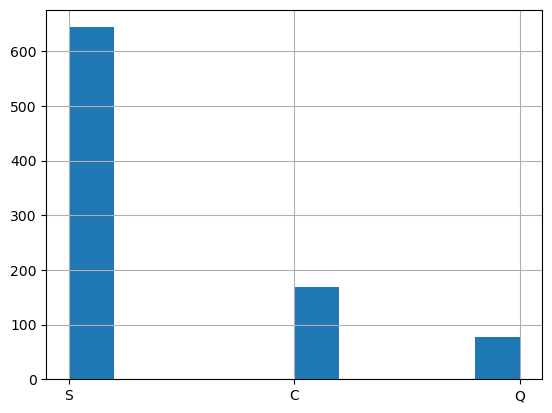

In [7]:
# Histogram for numerical column
titanic["Embarked"].dropna().hist()

## Right-Skewed (Positive Skewness): The histogram has a longer tail on the right side. The bulk of the data is on the left.
## Left-Skewed (Negative Skewness): The histogram has a longer tail on the left side. The bulk of the data is on the right.
## Symmetrical (Zero Skewness): The histogram is roughly symmetrical, with the tails on both sides being similar.

In [8]:
# Fill missing values for 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [9]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [10]:
# Drop the 'Cabin' column as it has too many missing values
titanic.drop(columns=['Cabin'], inplace=True)

In [11]:
# Convert 'Sex' to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [12]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Drop irrelevant columns
titanic.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked_Q   891 non-null    bool   
 7   Embarked_S   891 non-null    bool   
 8   FamilySize   891 non-null    int64  
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
